<a href="https://colab.research.google.com/github/keshavbharti07/diabetesAnalyzer/blob/main/diabetesAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, RocCurveDisplay
import pickle

# Load the dataset
df = pd.read_csv("diabetes.csv")

In [4]:
# Data overview
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# Data preprocessing
X = df.drop(columns="Outcome", axis=1)
y = df["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Initialize classifiers
models = {
    "SVM (Linear Kernel)": svm.SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [7]:
# Train each model and evaluate
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training set
    X_train_prediction = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, X_train_prediction)

    # Predict on the test set
    X_test_prediction = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, X_test_prediction)

    print(f"{name}:")
    print(f"  Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"  Testing Accuracy: {test_accuracy * 100:.2f}%\n")

    # Save the model
    filename = f"{name.replace(' ', '_').lower()}_diabetesmodel.sav"
    pickle.dump(model, open(filename, 'wb'))

SVM (Linear Kernel):
  Training Accuracy: 78.66%
  Testing Accuracy: 77.27%

Random Forest:
  Training Accuracy: 100.00%
  Testing Accuracy: 75.97%

Logistic Regression:
  Training Accuracy: 78.50%
  Testing Accuracy: 75.97%

Gradient Boosting:
  Training Accuracy: 92.51%
  Testing Accuracy: 70.13%



In [8]:
# Model comparison
model_names = list(models.keys())
test_accuracies = [accuracy_score(y_test, model.predict(X_test)) * 100 for model in models.values()]

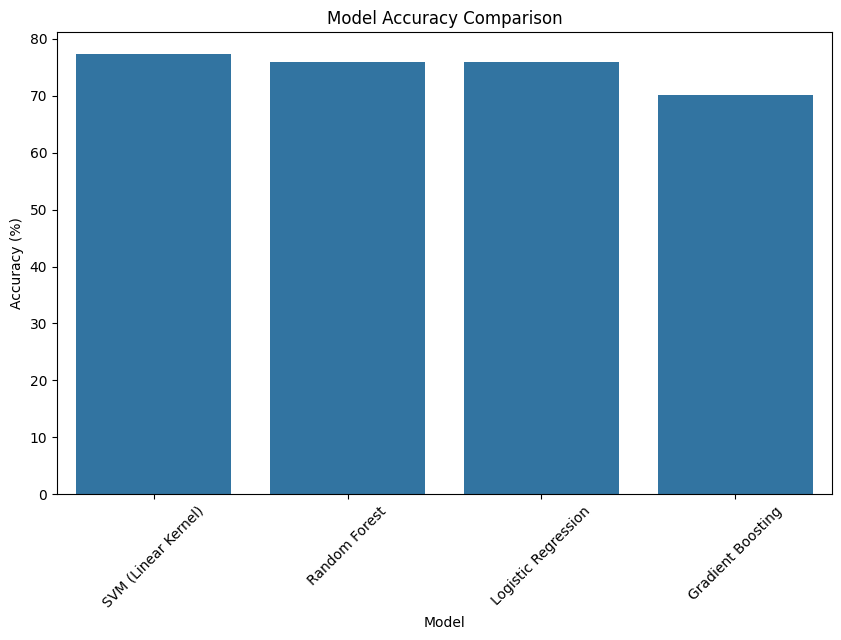

In [9]:
# Visualization - Accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=test_accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.show()



<Figure size 1000x600 with 0 Axes>

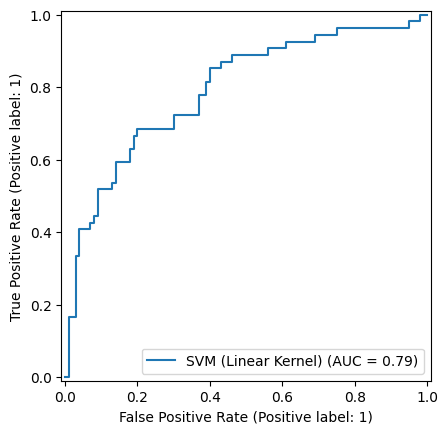

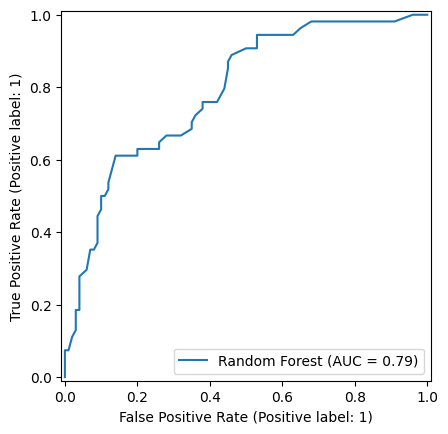

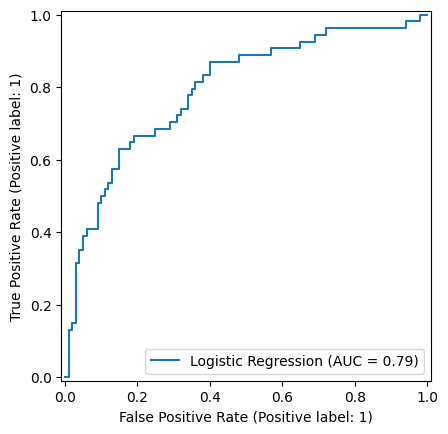

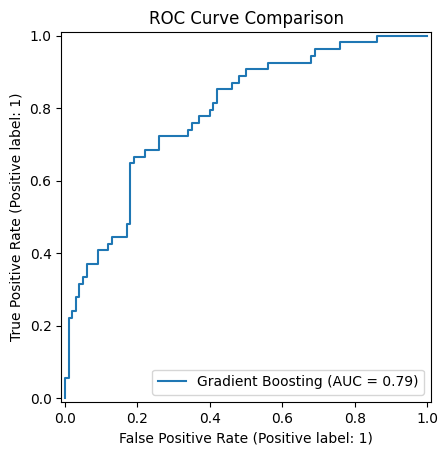

In [10]:
# Visualizing ROC Curve for all models
plt.figure(figsize=(10, 6))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)
plt.title('ROC Curve Comparison')
plt.show()





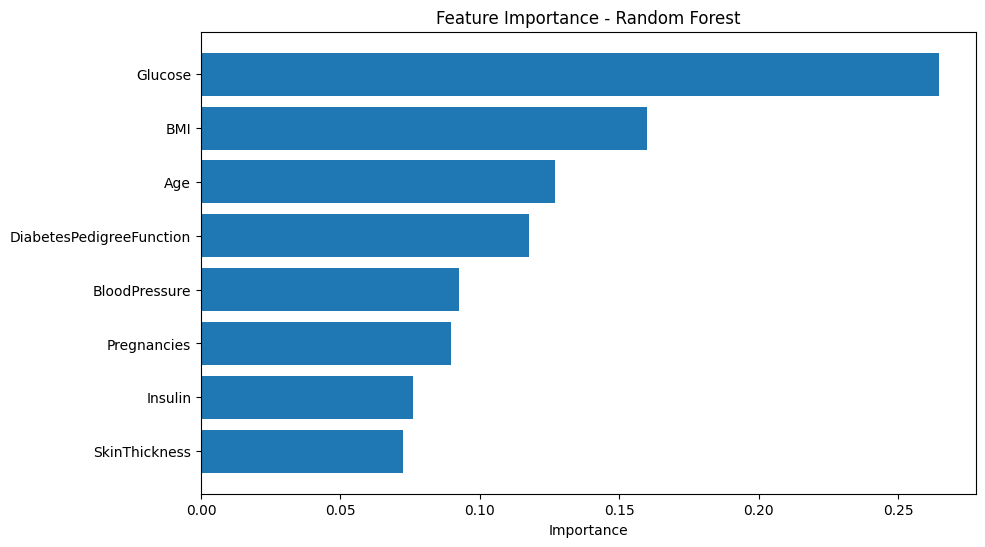

In [11]:
# Feature importance for Random Forest
if "Random Forest" in models:
    rf_model = models["Random Forest"]
    feature_importance = rf_model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    plt.figure(figsize=(10, 6))
    plt.barh(np.array(X.columns)[sorted_idx], feature_importance[sorted_idx])
    plt.title('Feature Importance - Random Forest')
    plt.xlabel('Importance')
    plt.show()

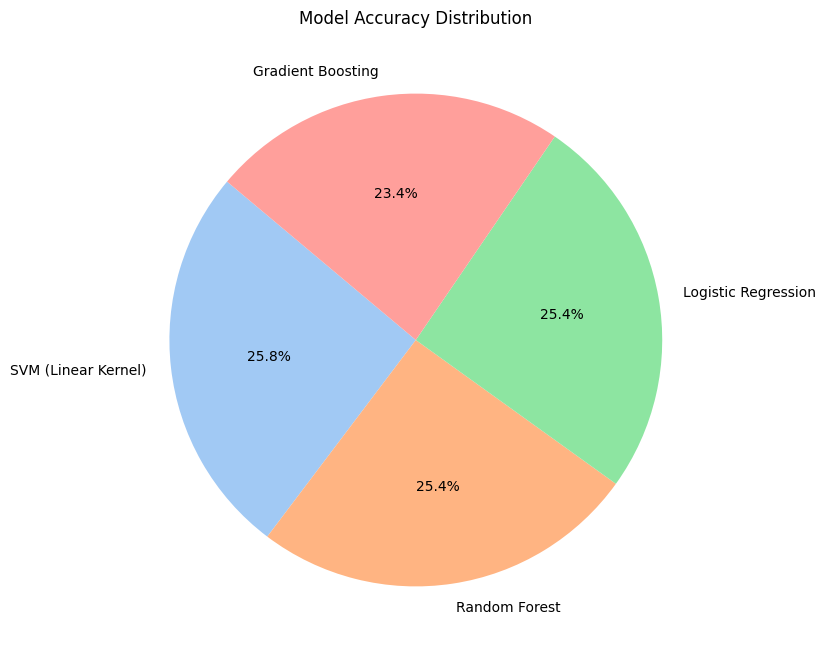

In [12]:
# Pie chart - Accuracy distribution
plt.figure(figsize=(8, 8))
plt.pie(test_accuracies, labels=model_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Model Accuracy Distribution')
plt.show()

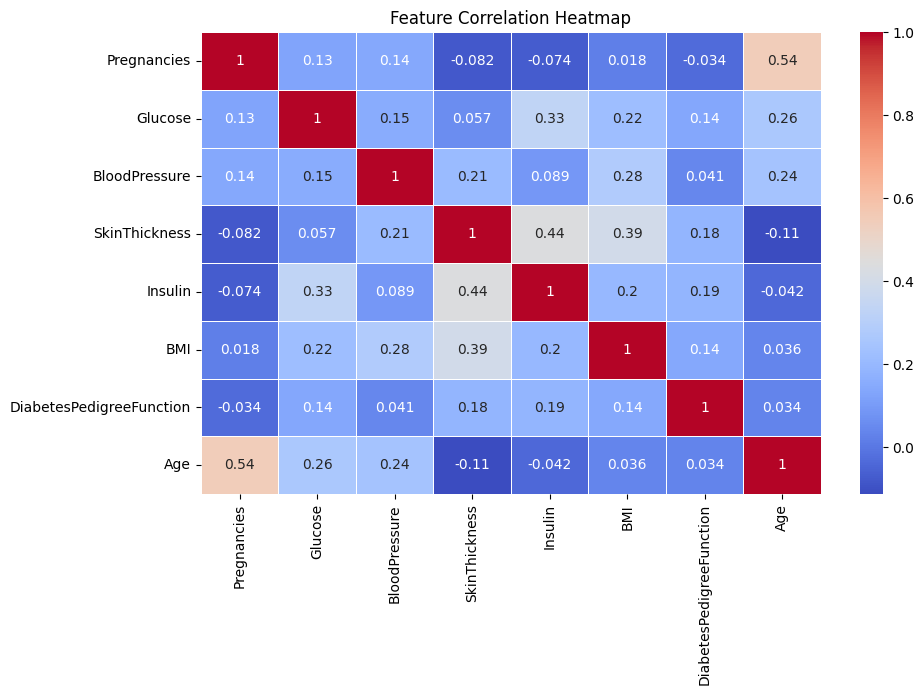

In [13]:
# Heatmap - Feature Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

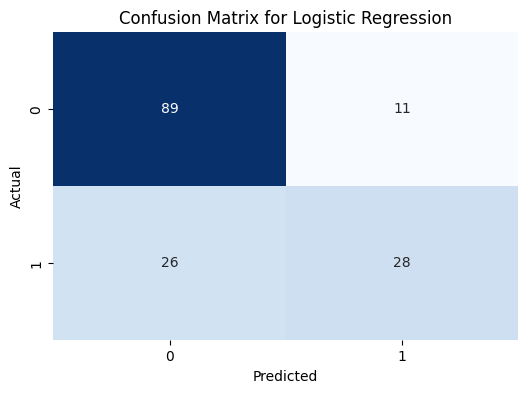

In [ ]:
# Confusion matrix visualization for Logistic Regression
logistic_model = models["Logistic Regression"]
y_pred_logistic = logistic_model.predict(X_test)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Here are the parameters for normal and diabetic individuals presented in points:

# - **Glucose (mg/dL)**:
#   - **Normal Range**: 70 - 99 (fasting), < 140 (2-hour postprandial)
#   - **Diabetic Range**: ≥ 126 (fasting), ≥ 200 (2-hour postprandial)

# - **Blood Pressure (mm Hg)**:
#   - **Normal Range**: < 80 (diastolic)
#   - **Diabetic Range**: ≥ 90 (diastolic)

# - **Skin Thickness (mm)**:
#   - **Normal Range**: < 25
#   - **Diabetic Range**: ≥ 25

# - **Insulin (μU/mL)**:
#   - **Normal Range**: 2 - 25
#   - **Diabetic Range**: > 25

# - **BMI (kg/m²)**:
#   - **Normal Range**: 18.5 - 24.9
#   - **Diabetic Range**: ≥ 25

# - **Diabetes Pedigree Function (DPF)**:
#   - **Normal Range**: 0 - 0.5
#   - **Diabetic Range**: > 0.5

# - **Age (years)**:
#   - **Normal Range**: 18 - 39
#   - **Diabetic Range**: 40+

In [ ]:

# Function to take user input and make predictions
def get_user_input_and_predict(model, scaler):
    print("\nEnter the values for the following parameters:")
    user_input = []
    for col in X.columns:
        val = float(input(f"{col}: "))
        user_input.append(val)

    # Convert to numpy array and reshape
    input_data_as_numpy_arr = np.asarray(user_input)
    input_data_reshape = input_data_as_numpy_arr.reshape(1, -1)

    # Standardize the input data
    std_data = scaler.transform(input_data_reshape)

    # Predict using the chosen model
    prediction = model.predict(std_data)
    if prediction[0] == 0:
        print("Prediction: This person is Non-Diabetic")
    else:
        print("Prediction: This person is Diabetic")

# Let user choose a model for prediction
print("\nChoose a model for making predictions:")
for i, name in enumerate(models.keys()):
    print(f"{i + 1}. {name}")

choice = int(input("\nEnter your choice (1-4): "))
selected_model_name = list(models.keys())[choice - 1]
selected_model = models[selected_model_name]

# Get user input and predict
get_user_input_and_predict(selected_model, scaler)


Choose a model for making predictions:
1. SVM (Linear Kernel)
2. Random Forest
3. Logistic Regression
4. Gradient Boosting

Enter your choice (1-4): 1

Enter the values for the following parameters:
Pregnancies: 0
Glucose: 300
BloodPressure: 200
SkinThickness: 30
Insulin: 30
BMI: 30
DiabetesPedigreeFunction: 1
Age: 40
Prediction: This person is Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
